# Предварительная настройка окружения ⛺

In [12]:
!pip freeze

absl-py==1.0.0
anytree==2.8.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
async-generator==1.10
attrs==21.4.0
backcall==0.2.0
beautifulsoup4==4.9.3
black==22.1.0
bleach==4.1.0
Brotli==1.0.9
bs4==0.0.1
cachetools==5.0.0
catboost==1.0.6
certifi==2021.10.8
cffi==1.15.0
chardet==4.0.0
charset-normalizer==2.0.12
click==8.0.3
colorama==0.4.4
cryptography==36.0.2
cycler==0.11.0
Cython==0.29.28
DateTime==4.4
debugpy==1.5.1
decorator==5.1.1
defusedxml==0.7.1
duckduckgo-search==1.5.2
entrypoints==0.4
et-xmlfile==1.1.0
executing==0.8.2
fonttools==4.30.0
gensim==4.2.0
google-auth==2.6.5
google-auth-oauthlib==0.4.6
googlesearch-python==1.1.0
graphviz==0.20
grpcio==1.44.0
h11==0.13.0
idna==2.10
imageio==2.20.0
importlib-metadata==4.11.3
ipykernel==6.9.0
ipython==8.0.1
ipython-genutils==0.2.0
ipywidgets==7.6.5
jedi==0.18.1
Jinja2==3.0.3
joblib==1.1.0
jsonschema==4.4.0
jupyter==1.0.0
jupyter-client==7.1.2
jupyter-console==6.4.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextens

## Импорт библиотек 📦

In [1]:
import numpy as np # ver. 1.22.2
import pandas as pd # ver. 1.4.0
import seaborn as sns # ver. 0.11.2
import matplotlib.pyplot as plt # ver. 3.5.1
import random # стандартная библиотека
from copy import deepcopy # стандартная библиотека

#sklearn ver. 0.0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef as MCC_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#catboost ver. 1.0.6
from catboost import Pool, cv
from catboost import CatBoostClassifier

from tqdm import tqdm

C:\Users\MgDuck\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Установка некоторых настроек 🔧

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
random.seed(22)
np.random.seed(22)

# Работа с данными 📩🔬🧮

__Импорт данных 📥__

In [4]:
train = pd.read_csv("train.csv", sep=';')
test = pd.read_csv("test.csv", sep=';')

__Быстрый взгляд 🔬__

In [5]:
train.describe()

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,294258.000000,294258.000000,294258.000000,258144.000000,262930.000000,265786.000000,279564.000000,279564.000000,281984.000000,148829.000000,280209.000000,280209.000000,294258.000000,294258.000000,294258.000000,166853.000000,286618.000000,277160.000000,153723.000000,148829.000000,294124.000000,286899.000000,286899.000000,286899.000000,286899.000000,286899.000000,167474.000000,167474.000000,167474.000000,167474.000000,167474.000000,286899.000000,286899.000000
mean,0.024149,54.732133,55.154934,0.000573,0.000591,0.000745,0.000902,0.000247,0.157069,0.000169,0.000690,0.000955,0.126545,0.317709,0.148264,0.000081,0.000038,0.002789,0.022622,0.057591,0.020186,0.514443,0.024963,0.158855,0.029383,0.000303,0.118867,0.537152,0.003187,0.008172,0.186825,0.008941,0.000097
std,0.153512,5.101274,27.235237,0.001142,0.001101,0.001267,0.003160,0.001825,0.175730,0.002208,0.004673,0.005670,0.001089,0.003897,0.001139,0.002148,0.001337,0.008487,0.005559,0.060616,0.048114,0.175017,0.027384,0.116387,0.059065,0.001089,0.119459,0.273556,0.005874,0.011134,0.284884,0.011068,0.000929
min,0.000000,41.579243,19.920451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103030,0.211720,0.125960,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.599710,37.762513,0.000110,0.000120,0.000160,0.000000,0.000000,0.019820,0.000000,0.000000,0.000000,0.126010,0.314570,0.147660,0.000000,0.000000,0.000780,0.024100,0.010310,0.003980,0.400470,0.011110,0.076490,0.000000,0.000000,0.010160,0.535010,0.000000,0.000000,0.009430,0.001730,0.000000
50%,0.000000,55.345232,44.032430,0.000330,0.000350,0.000450,0.000000,0.000000,0.056150,0.000000,0.000000,0.000000,0.126550,0.317470,0.148180,0.000000,0.000000,0.002000,0.024100,0.039480,0.009480,0.532470,0.019230,0.119050,0.000000,0.000000,0.084110,0.630740,0.000000,0.005330,0.036440,0.006410,0.000000
75%,0.000000,56.994743,60.827859,0.000740,0.000760,0.000970,0.000000,0.000000,0.414520,0.000000,0.000000,0.000000,0.127000,0.319610,0.148780,0.000000,0.000000,0.003800,0.024100,0.086260,0.020650,0.641320,0.028820,0.198240,0.039150,0.000000,0.206473,0.705880,0.004850,0.011490,0.276010,0.012170,0.000000
max,1.000000,69.725102,170.350467,0.314800,0.292930,0.279930,0.206900,0.078260,0.995900,0.541940,0.470790,0.510130,0.144930,0.494830,0.177740,0.285710,0.090910,0.998260,0.240960,0.629200,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,0.250000


In [6]:
test.describe()

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,152766.000000,152766.000000,152766.000000,136217.000000,137826.000000,138880.000000,146774.000000,146774.000000,147118.000000,79217.000000,146920.000000,146920.000000,152766.000000,152766.000000,152766.000000,87503.000000,149182.000000,146769.000000,81206.000000,79217.000000,152693.000000,149285.000000,149285.000000,149285.000000,149285.000000,149285.000000,88011.000000,88011.000000,88011.000000,88011.000000,88011.000000,149285.000000,149285.000000
mean,0.021065,54.680001,54.623391,0.000672,0.000732,0.000935,0.000839,0.000457,0.191008,0.000156,0.000592,0.000737,0.126569,0.317751,0.148284,0.000065,0.000033,0.001700,0.022885,0.055793,0.024456,0.526484,0.025009,0.142235,0.044321,0.001127,0.116925,0.499845,0.003428,0.008965,0.162912,0.013266,0.000316
std,0.143601,5.068619,26.905614,0.001123,0.001113,0.001407,0.003203,0.003083,0.187369,0.001077,0.004409,0.005016,0.001052,0.003781,0.001097,0.001869,0.001223,0.001955,0.005241,0.061684,0.051675,0.171475,0.026267,0.091050,0.080424,0.002151,0.116305,0.259421,0.006781,0.012752,0.254662,0.015765,0.001425
min,0.000000,41.567538,19.920451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112350,0.178960,0.130840,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.581204,37.748215,0.000150,0.000170,0.000210,0.000000,0.000000,0.021150,0.000000,0.000000,0.000000,0.126060,0.314570,0.147700,0.000000,0.000000,0.000720,0.024100,0.007770,0.006170,0.418460,0.011480,0.072460,0.000000,0.000000,0.012680,0.479730,0.000000,0.000000,0.007900,0.005590,0.000000
50%,0.000000,55.354012,43.857748,0.000410,0.000450,0.000580,0.000000,0.000000,0.084140,0.000000,0.000000,0.000000,0.126550,0.317840,0.148220,0.000000,0.000000,0.001710,0.024100,0.036530,0.012180,0.544590,0.019610,0.122500,0.000000,0.000000,0.081730,0.592100,0.000000,0.005100,0.030610,0.009170,0.000000
75%,0.000000,56.918648,60.560242,0.000870,0.000950,0.001210,0.000000,0.000000,0.419350,0.000000,0.000000,0.000000,0.126990,0.319610,0.148760,0.000000,0.000000,0.001830,0.024100,0.083780,0.024390,0.649330,0.029620,0.176100,0.073380,0.001740,0.203310,0.662045,0.005220,0.012200,0.218670,0.014480,0.000000
max,1.000000,69.725102,162.564960,0.122020,0.134760,0.179990,0.313220,0.165220,1.000000,0.102940,0.467680,0.467680,0.146920,0.461560,0.174200,0.142860,0.045460,0.109490,0.132530,0.678530,1.000000,1.000000,1.000000,1.000000,1.000000,0.166670,1.000000,1.000000,1.000000,0.250000,1.000000,0.666670,0.142860


__Что можно заметить__: валидационная и обучающая выборка имеют довольно схожие *оценки*. Это важно, чтобы можно было быть более уверенным в репрезентативности "скоров" наших моделей, обученных на одних данных, а оценённых на других\
__+__: есть большой дисбаланс классов => поэтому за eval-метрику взят MCC, как более устойчивый к такого рода смещению

__Прочие расчёты 🧮__ 

<AxesSubplot:>

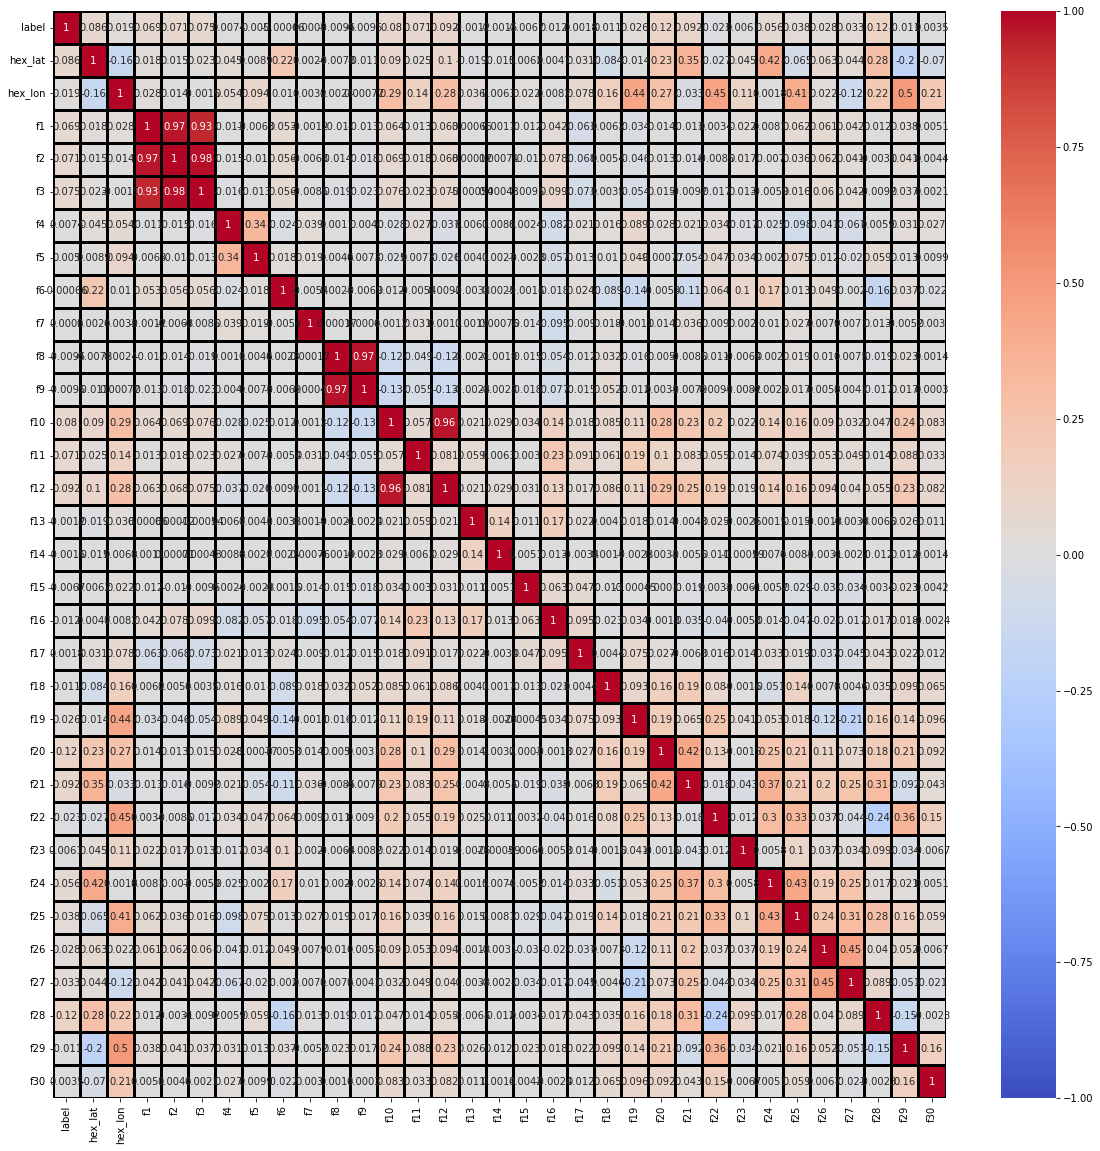

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(),annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', ax=ax)

__Примечание__: высококоррелирующих столбцов немного. При удаление одних из столбцов, что высоко коррелируют с другими, было замечено ухудшение скора, поэтому от данной операции было принято решение отказаться

# Строим baseline-модель 🛴

Так как первоначально не было предложено baseline-модели, то было принято решение построить её самим, дабы потом было от чего отталкиваться (решать такие вопросы как: улучшился ли скор и т.п.)

In [8]:
need_columns = ['label','period','subject_type','city_name','hex'] # столбцы нужные для удаления 
                                                                   # (повышенная сложность интерпретации)

X = train.drop(need_columns, axis=1).fillna(0) # затруднительно понять какая замена наиболее релевантная (выбрали 0)
y = train['label']

X_test = test.drop(need_columns, axis=1).fillna(0)
y_test = test['label']

In [14]:
params = {"iterations": 300,
          "depth": 7,
          "loss_function": "Logloss",
          'eval_metric': 'MCC',
          'learning_rate': 0.1,
    'custom_metric' : ['Accuracy','Precision','Recall','F1','Logloss'],
          "verbose": False,
         "use_best_model": True}

cv_dataset = Pool(data=X,
                  label=y, cat_features=['subject_name'])

scores_base = cv(cv_dataset,
            params,
            stratified=True,
            return_models=True,
            fold_count=5,
            shuffle="True",
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.09899600074
bestIteration = 291

Training on fold [1/5]

bestTest = 0.1074927078
bestIteration = 217

Training on fold [2/5]

bestTest = 0.09383931941
bestIteration = 283

Training on fold [3/5]

bestTest = 0.09783645529
bestIteration = 272

Training on fold [4/5]

bestTest = 0.1053088223
bestIteration = 283



Модель показывает на всех фолдах аналогичные результаты \
Для валидации будем использовать третью из пяти модель (по причине безразличия)

In [29]:
y_pred_base = scores_base[1][2].predict(X_test,prediction_type='Class')
print(classification_report(y_test, y_pred_base))
print('TP :',confusion_matrix(y_test, y_pred_base)[1,1])
print('FN :',confusion_matrix(y_test, y_pred_base)[1,0])
print('FP :',confusion_matrix(y_test, y_pred_base)[0,1])
print('TN :',confusion_matrix(y_test, y_pred_base)[0,0])
print('precision: ',precision_score(y_test, y_pred_base))
print('recall : ',recall_score(y_test, y_pred_base))
print('MCC : ',MCC_score(y_test, y_pred_base))
print('F1 : ',f1_score(y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    149548
           1       0.22      0.01      0.01      3218

    accuracy                           0.98    152766
   macro avg       0.60      0.50      0.50    152766
weighted avg       0.96      0.98      0.97    152766

TP : 19
FN : 3199
FP : 67
TN : 149481
precision:  0.22093023255813954
recall :  0.005904288377874456
MCC :  0.03303231493869039
F1 :  0.011501210653753027


__Краткий итог__ по baseline-модели: если судить по MCC, то видно, что модель предсказывает немного лучше, чем "случайная". Однако слишком мало положительного класса (а именно его мы ищем) и даже при этом небольшой precision на этом классе. *Модель рабочая, но далеко далека от идеала* 

# Feature engineering & feature selection 🏗 

❗❗❗ *здесь пропущен процесс обучения, ведь был он продолжителен и выполнялся на другом, более производительном "железе"* \
*Поэтому "хорошие фичи" предзадаются. (при желании можно проверить весь код, что закомментирован, и был использован, во время обучения и feature selection'a)*

Пытаясь взять максимум информации из предложенного датасета с *фичами*, мы пришли к тому, что эти *фичи* нужно попытаться комбинировать, делая нелинейные преобразования. Самым банальным и самым работающим решением, по нашему опыту, было их попарное перемножение.

Однако обучаться на 900+ *фичах* может оказаться неэффективным, ведь может так быть, что бОльшая часть *фичей* будет шумовыми по итогу. Мы пришли к выводу, что от таких *фичей* нужно избавляться. **Но как?...**

Здесь мы приходим к нашему методу уменьшения размерности, что пока ещё не приобрёл широкую известность, но при этом на практике показывал себя довольно эффективно

__1)__ Добавляем две *фичи*, которые действительно шумовые

In [10]:
train['noise_bin'] = np.random.randint(low=0, high=1, size=len(train))
train['noise_10000'] = np.random.randint(low=0, high=100000, size=len(train))

need_columns = ['label','period','subject_type','city_name','hex']


X = train.drop(need_columns, axis=1).fillna(0)
y = train['label']

X_test = test.drop(need_columns, axis=1).fillna(0)
y_test = test['label']

__2)__ Генерируем *фичи*

In [11]:
def pw_prod(df):
    for col1 in [f'f{i}' for i in range(1, 31)]:
        for col2 in [f'f{i}' for i in range(1, 31)]:
            df[f'{col1}_{col2}'] = df[col1] * df[col2]
pw_prod(X)
pw_prod(X_test)

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

__3)__ Обучаем CatBoostClassifier

In [33]:
#params = {"iterations": 300,
#          "depth": 7, 
#          "loss_function": "Logloss",
#          'eval_metric': 'MCC',
#          'learning_rate': 0.1, 
#          'custom_metric' : ['Accuracy','Precision','Recall','F1','Logloss'],
#          "verbose": False,
#        
#          "use_best_model": True,
#          'task_type': 'GPU'}

#cv_dataset = Pool(data=X,
#                  label=y, cat_features=['subject_name'])

#scores_base = cv(cv_dataset,
#            params,
#            stratified=True,
#            return_models=True,
#            fold_count=5,
#            shuffle="True",
#            plot="True")

__4)__ Пользуясь функционалом CatBoost'a делаем пересечение всех множеств *фич*, у которых (*фич*) feature_importance выше, чем у специально созданных шумовых *фич*. (Одна модель => одно множество) \
Конечное пересечение -- наши *фичи* для обучения


In [34]:
#importance_df = scores_base[1][0].get_feature_importance(prettified=True)
#stop_index = importance_df[importance_df['Feature Id'] == 'noise_10000'].index[0]
#set_of_good_features = set(importance_df['Feature Id'][:stop_index].to_list())
#for i in range(5): # 2,3
#    importance_df = scores_base[1][i].get_feature_importance(prettified=True)
#    stop_index = importance_df[importance_df['Feature Id'] == 'noise_10000'].index[0]
#    new_set = set(importance_df['Feature Id'][:stop_index].to_list())
#    set_of_good_features = set_of_good_features & new_set

__5)__ Пользуемся ими

In [12]:
set_of_good_features = ['f24_f28', 'f21_f21', 'f10_f10', 'f11_f10', 'f21_f10', 'f15_f19', 'f10', 'f3_f3', \
                        'f12_f16', 'f3_f10', 'f10_f16', 'f21_f15', 'f3_f20', 'f11_f2', 'f11_f11', 'f11_f21', \
                        'hex_lat', 'f12_f11', 'f10_f12', 'f12_f10', 'hex_lon', 'subject_name', 'f12_f12', 'f16_f12', \
                        'f20_f28', 'f28_f20', 'f16_f10', 'f21_f28', 'f10_f11', 'f28_f19', 'f12', 'f1_f10', 'f11_f12']

# Модель вторая 🛵

In [13]:
#выполнение всех шагов до этого обязательны
X = X[set_of_good_features]
X_test = X_test[set_of_good_features]

In [14]:
params = {"iterations": 300,
          "depth": 7,
          "loss_function": "Logloss",
          'eval_metric': 'MCC',
          'learning_rate': 0.1,
          'custom_metric' : ['Accuracy','Precision','Recall','F1'],
          "verbose": False,
          "class_weights":[1,5], # добавили параметр для работы с дисбалансом (рекомендация разработчиков)
          "use_best_model": True}

cv_dataset = Pool(data=X,
                  label=y, cat_features=['subject_name'])

scores_second = cv(cv_dataset,
            params,
            stratified=True,
            return_models=True,
            fold_count=5,
            shuffle="True",
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3746822708
bestIteration = 239

Training on fold [1/5]

bestTest = 0.358809976
bestIteration = 107

Training on fold [2/5]


KeyboardInterrupt: 

In [ ]:
y_pred_second = scores_second[1][2].predict(X_test,prediction_type='Class')
print(classification_report(y_test, y_pred_second))
print('TP :',confusion_matrix(y_test, y_pred_second)[1,1])
print('FN :',confusion_matrix(y_test, y_pred_second)[1,0])
print('FP :',confusion_matrix(y_test, y_pred_second)[0,1])
print('TN :',confusion_matrix(y_test, y_pred_second)[0,0])
print('precision: ',precision_score(y_test, y_pred_second))
print('recall : ',recall_score(y_test, y_pred_second))
print('MCC : ',MCC_score(y_test, y_pred_second))
print('F1 : ',f1_score(y_test, y_pred_second))

__Краткий итог__ по second-модели: если судить по MCC, то видно, что модель предсказывает заметно лучше, чем baseline-модель. Положительного класса сильно больше, при пропорционально меньшем уменьшении precion'a. *Видны успехи, а это только повод продолжать улучшать скор*

# Обогащение данных 💽 и апгрейд второй модели 🔼 

Обогащение данных: \
1) Для дополнения модели, мы решили добавить число запросов "кс го" по городам за нужный промежуток времени(2021 год, до июня(однако стоит поинмать, что интерес всегда пропорционально одинаков, поэтому считать это данным из "будущего" не совсем корректно)) с сайта wordstat.  Опираясь на гипотезу о необходимости высокой скорости интернета и низкого пинга для именно для данной игры, пользователи этого шутера могут составлять потенциальную группу целевой аудитории продукта.  \
https://wordstat.yandex.ru/#!/regions?filter=cities&words=%D0%BA%D1%81%20%D0%B3%D0%BE \
2) Также была выдвинута гипотеза о связи среднего уровня дохода по региону и спроса на продукт, так как данный тариф по предпосылкам является нормальным благом. \
По данным Росстата выудили следующую таблицу:\
https://gogov.ru/articles/average-salary

In [15]:
train_extra = pd.read_csv("train_extra.csv", sep=',')

In [16]:
extra_dict = train_extra[['subject_name','share_views','2019','views']].groupby('subject_name').max().to_dict()

In [17]:
extra_dict['2019']['Удмуртская'] = extra_dict['2019']['Удмуртия']
extra_dict['share_views']['Удмуртская'] = extra_dict['share_views']['Удмуртия']
extra_dict['views']['Удмуртская'] = extra_dict['views']['Удмуртия']

extra_dict['2019']['Чувашская'] = extra_dict['2019']['Чувашия']
extra_dict['share_views']['Чувашская'] = extra_dict['share_views']['Чувашия']
extra_dict['views']['Чувашская'] = extra_dict['views']['Чувашия']

extra_dict['2019']['Северная Осетия - Алания'] = extra_dict['2019']['Северная Осетия']
extra_dict['share_views']['Северная Осетия - Алания'] = extra_dict['share_views']['Северная Осетия']
extra_dict['views']['Северная Осетия - Алания'] = extra_dict['views']['Северная Осетия']

extra_dict['2019']['Кабардино-Балкарская'] = extra_dict['2019']['Кабардино-Балкария']
extra_dict['share_views']['Кабардино-Балкарская'] = extra_dict['share_views']['Кабардино-Балкария']
extra_dict['views']['Кабардино-Балкарская'] = extra_dict['views']['Кабардино-Балкария']

extra_dict['2019']['Ханты-Мансийский Автономный Округ - Югра'] = extra_dict['2019']['Ханты-Мансийский']
extra_dict['share_views']['Ханты-Мансийский Автономный Округ - Югра'] = extra_dict['share_views']['Ханты-Мансийский']
extra_dict['views']['Ханты-Мансийский Автономный Округ - Югра'] = extra_dict['views']['Ханты-Мансийский']

extra_dict['2019']['Кемеровская Область-Кузбасс'] = extra_dict['2019']['Кемеровская']
extra_dict['share_views']['Кемеровская Область-Кузбасс'] = extra_dict['share_views']['Кемеровская']
extra_dict['views']['Кемеровская Область-Кузбасс'] = extra_dict['views']['Кемеровская']

extra_dict['2019']['Саха /Якутия/'] = extra_dict['2019']['Саха']
extra_dict['share_views']['Саха /Якутия/'] = extra_dict['share_views']['Саха']
extra_dict['views']['Саха /Якутия/'] = extra_dict['views']['Саха']


In [18]:
X['2019'] = list(map(lambda x: extra_dict['2019'][x], X['subject_name']) )
X['2019'] = list(map(lambda x: int(x.split()[0] + x.split()[1]), X['2019']) )

X['share_views'] = list(map(lambda x: extra_dict['share_views'][x], X['subject_name']) )
X['views'] = list(map(lambda x: extra_dict['views'][x], X['subject_name']) )

In [19]:
X_test['2019'] = list(map(lambda x: extra_dict['2019'][x], X_test['subject_name']) )
X_test['2019'] = list(map(lambda x: int(x.split()[0] + x.split()[1]), X_test['2019']) )

X_test['share_views'] = list(map(lambda x: extra_dict['share_views'][x], X_test['subject_name']) )
X_test['views'] = list(map(lambda x: extra_dict['views'][x], X_test['subject_name']) )

In [20]:
params = {"iterations": 300,
          "depth": 7,
          "loss_function": "Logloss",
          'eval_metric': 'MCC',
          'learning_rate': 0.1,
          'custom_metric' : ['Accuracy','Precision','Recall','F1'],
          "verbose": False,
          "class_weights":[1,5], # добавили параметр для работы с дисбалансом (рекомендация разработчиков)
          "use_best_model": True}

cv_dataset = Pool(data=X,
                  label=y, cat_features=['subject_name'])

scores_second_up = cv(cv_dataset,
            params,
            stratified=True,
            return_models=True,
            fold_count=5,
            shuffle="True",
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3847724214
bestIteration = 169

Training on fold [1/5]

bestTest = 0.3619440872
bestIteration = 232

Training on fold [2/5]

bestTest = 0.3524498408
bestIteration = 185

Training on fold [3/5]

bestTest = 0.3533144583
bestIteration = 137

Training on fold [4/5]

bestTest = 0.3641473809
bestIteration = 161



In [21]:
y_pred_second_up = scores_second_up[1][2].predict(X_test,prediction_type='Class')
print(classification_report(y_test, y_pred_second_up))
print('TP :',confusion_matrix(y_test, y_pred_second_up)[1,1])
print('FN :',confusion_matrix(y_test, y_pred_second_up)[1,0])
print('FP :',confusion_matrix(y_test, y_pred_second_up)[0,1])
print('TN :',confusion_matrix(y_test, y_pred_second_up)[0,0])
print('precision: ',precision_score(y_test, y_pred_second_up))
print('recall : ',recall_score(y_test, y_pred_second_up))
print('MCC : ',MCC_score(y_test, y_pred_second_up))
print('F1 : ',f1_score(y_test, y_pred_second_up))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    149548
           1       0.14      0.12      0.13      3218

    accuracy                           0.97    152766
   macro avg       0.56      0.55      0.56    152766
weighted avg       0.96      0.97      0.96    152766

TP : 378
FN : 2840
FP : 2325
TN : 147223
precision:  0.13984461709211987
recall :  0.11746426351771287
MCC :  0.11101250233483774
F1 :  0.12768113494342173


__Результаты от обогащения:__ лучше чем было, но хуже, чем хотелось бы

# Импорт другой модели 🛫 (на доработке)

In [113]:
!pip install autogluon

     --------------------------------------- 48.8/48.8 KB 30.4 kB/s eta 0:00:00
     ------------------------------------ 149.4/149.4 KB 892.1 kB/s eta 0:00:00
     -------------------------------------- 65.4/65.4 KB 441.6 kB/s eta 0:00:00
     --------------------------------------- 61.9/61.9 KB 44.1 kB/s eta 0:00:00
     -------------------------------------- 274.2/274.2 KB 1.9 MB/s eta 0:00:00
     --------------------------------------- 59.4/59.4 KB 51.5 kB/s eta 0:00:00
     ------------------------------------ 210.4/210.4 KB 194.1 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\MgDuck\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\MgDuck\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ------------------------------------ 132.5/132.5 KB 137.2 kB/s eta 0:00:00
     -------------------------------------- 802.2/802.2 KB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 34.3/34.3 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 20.3/20.3 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 245.9/245.9 KB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 109.4/109.4 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 912.

     ---------------------------------------- 8.8/8.8 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 125.4/125.4 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 8.6 MB/s eta 0:00:00
     -------------------------------------- 208.5/208.5 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 14.0/14.0 MB 7.2 MB/s eta 0:00:00
     ------------------------------------ 161.8/161.8 MB 782.8 kB/s eta 0:00:00
     ------------------------------------ 120.7/120.7 KB 470.0 kB/s eta 0:00:00
     -------------------------------------- 79.6/79.6 KB 261.6 kB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 554.9/554.9 KB 3.5 MB/s eta 0:00:00
     -------------------------------------- 47.9/47.9 KB 598.1 kB/s eta 0:00:00
     ---------------------------------------- 23

In [115]:
import pickle
import autogluon

with open("AUTOML\\content\\res_gluon_best_quality_rs42_of_random_undersampler_precision_macro_validation_wrong\\agModels-predictClass\\predictor.pkl", 'rb') as f:
    automlpredictor = pickle.load(f)

ModuleNotFoundError: No module named 'autogluon'

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,2020-05-01,Город,Москва,Москва,8611aa7a7ffffff,55.729458,37.516569,0.00101,0.00103,0.00195,0.0,0.0,0.41452,NaN,0.00000,0.00000,0.12653,0.33941,0.14816,NaN,0.0,0.00428,NaN,NaN,0.00993,0.26303,0.02109,0.13027,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01737,0.0
1,1,2020-05-01,Город,Москва,Москва,8611aa01fffffff,55.975851,37.237085,0.00000,0.00027,0.00053,0.0,0.0,0.41452,NaN,0.00007,0.00007,0.12478,0.31457,0.14645,NaN,0.0,0.00421,NaN,NaN,0.01152,0.17051,0.02304,0.08756,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01152,0.0
2,1,2020-05-01,Город,Москва,Москва,861181b6fffffff,55.622721,37.695121,0.00339,0.00313,0.00439,0.0,0.0,0.41452,0.0,0.00000,0.00000,0.12628,0.32194,0.14791,0.0,0.0,0.00241,0.0241,0.09609,0.00899,0.24390,0.03081,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,2020-05-01,Город,Москва,Москва,8611aa017ffffff,55.941586,37.157487,0.00048,0.00054,0.00055,0.0,0.0,0.41452,NaN,0.00000,0.00000,0.12810,0.31457,0.14969,NaN,0.0,0.00158,NaN,NaN,0.00423,0.20936,0.03348,0.10192,0.00000,0.00049,NaN,NaN,NaN,NaN,NaN,0.01495,0.0
4,1,2020-05-01,Город,Москва,Москва,8611aa637ffffff,55.797494,37.676200,0.00164,0.00179,0.00219,0.0,0.0,0.41452,0.0,0.00000,0.00000,0.12626,0.31812,0.14841,0.0,0.0,0.00040,0.0241,0.00278,0.01013,0.22785,0.01772,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,2020-12-01,Край,Хабаровский,Рощино,8614d6497ffffff,48.364768,134.996232,0.00111,0.00100,0.00110,0.0,0.0,0.15391,0.0,0.00000,0.00000,0.12841,0.32332,0.14999,0.0,0.0,0.00134,0.0241,0.09308,0.16129,0.90000,0.15000,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,2020-12-01,Край,Приморский,Шкотово,86316c8cfffffff,43.309803,132.345989,0.00075,0.00065,0.00076,0.0,0.0,0.00643,0.0,0.00000,0.00000,0.12823,0.32041,0.14982,0.0,0.0,0.00248,0.0241,0.05782,0.03521,0.87121,0.11364,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,2020-12-01,Край,Приморский,Партизанск,862ecdb2fffffff,43.057826,133.155582,0.00018,0.00014,0.00016,0.0,0.0,0.00140,0.0,0.00000,0.00000,0.12746,0.32405,0.14906,0.0,0.0,0.00172,0.0241,0.01304,0.06349,0.75000,0.11667,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,2020-12-01,Край,Камчатский,Вилючинск,861616747ffffff,52.908685,158.406443,0.00075,0.00138,0.00119,0.0,0.0,0.08380,NaN,0.00000,0.00000,0.13275,0.31457,0.15485,NaN,0.0,0.00009,NaN,NaN,0.02670,0.74645,0.14929,0.31990,0.08768,0.00000,NaN,NaN,NaN,NaN,NaN,0.06398,0.0


# СтатМодель 🌌 (на доработке)

Под самый конец соревнования мы также решили сделать модель, что работает по совершенно другой технологии

In [117]:
import scipy.stats as ss
import seaborn as sns

In [118]:
train_label_yes = train.loc[train['label'] == 1]
train_label_no = train.loc[train['label'] == 0]

In [119]:
def mann_test(df1, df2, num):
    col = 'f' + str(num)
    row1 = np.array(train_label_yes[col].dropna())
    row2 = np.array(train_label_no[col].dropna())
    return ss.mannwhitneyu(row1, row2)

In [120]:
mann_res = []

In [121]:
for i in range(1, 31):
    res = mann_test(train_label_yes, train_label_no, i)[1]
    if res < 0.01:
        mann_res.append(i)

In [122]:
def t_test(df1, df2, num):
    col = 'f' + str(num)
    row1 = np.array(train_label_yes[col].dropna())
    row2 = np.array(train_label_no[col].dropna())
    return ss.ttest_ind(row1, row2, equal_var=False)

In [123]:
t_test(train_label_yes, train_label_no, 1)

Ttest_indResult(statistic=9.757610228680297, pvalue=2.401495233922568e-22)

In [124]:
t_res = []

In [125]:
for i in range(1, 31):
    res = t_test(train_label_yes, train_label_no, i)[1]
    if res < 0.01:
        t_res.append(i)

In [126]:
diffs = set(mann_res) & set(t_res)
print(diffs)

{1, 2, 3, 4, 8, 9, 10, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


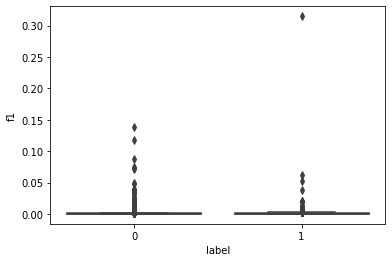

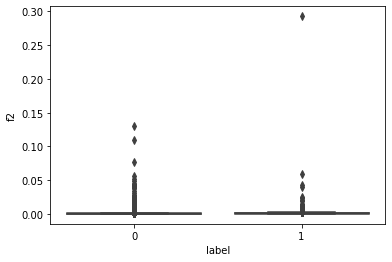

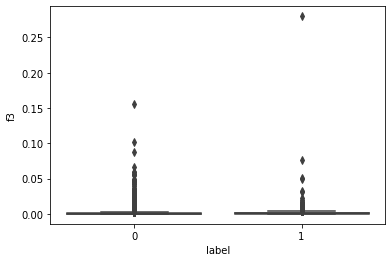

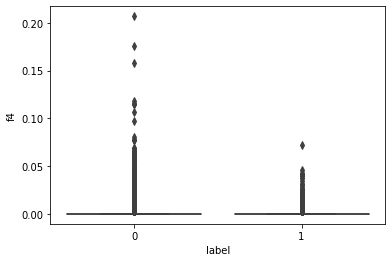

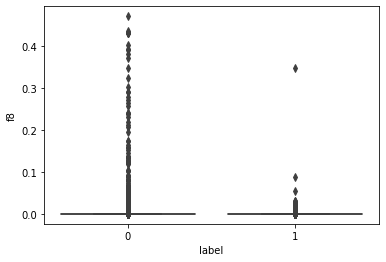

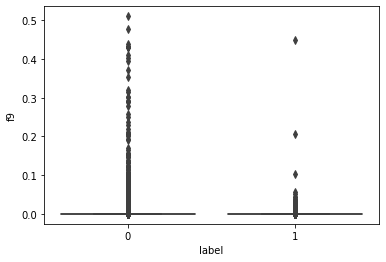

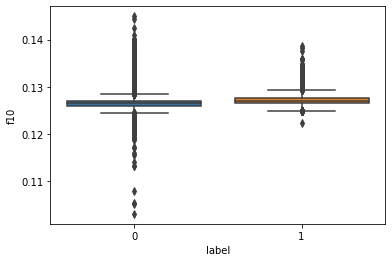

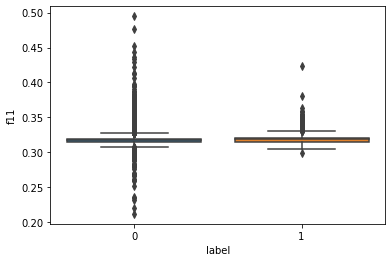

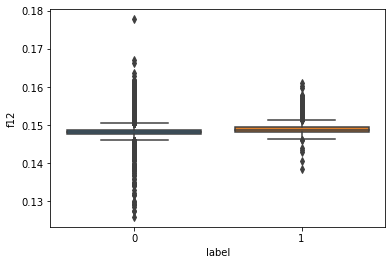

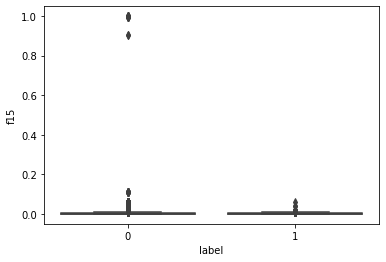

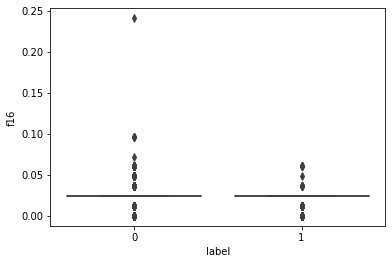

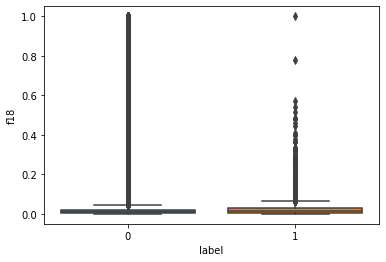

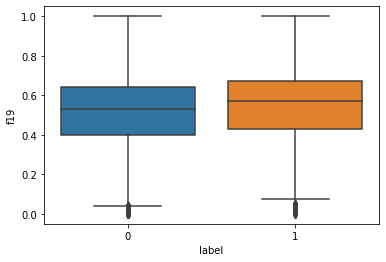

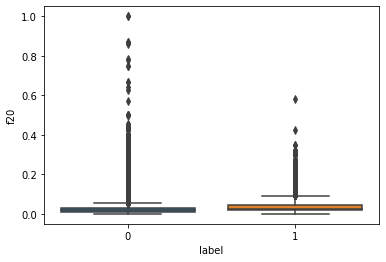

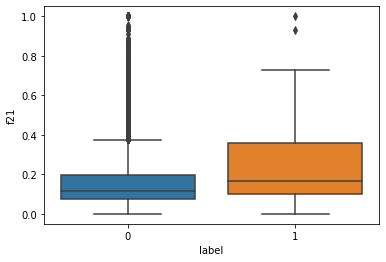

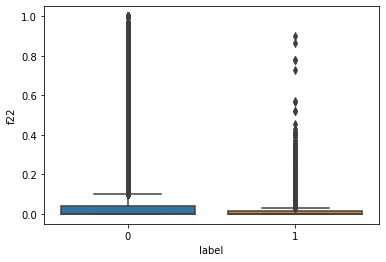

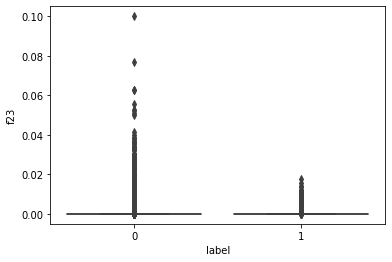

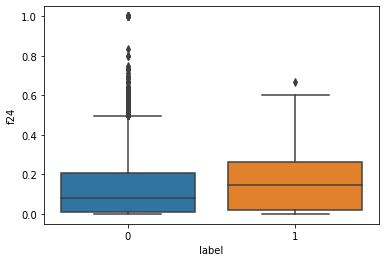

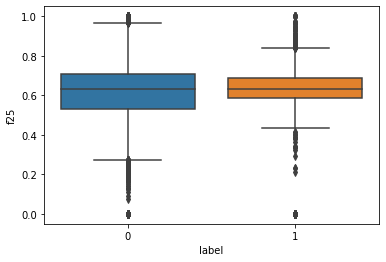

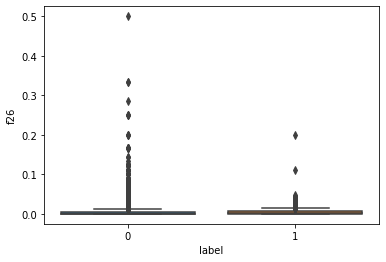

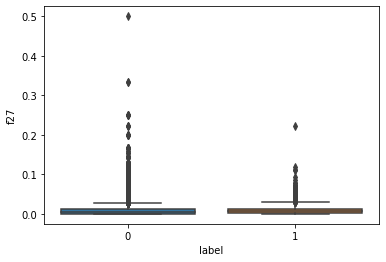

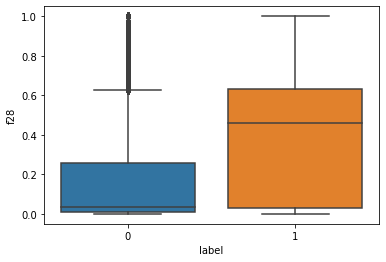

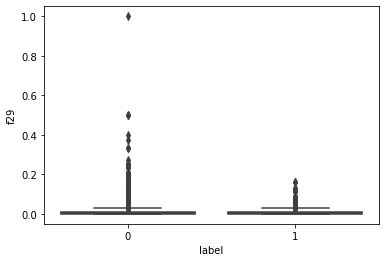

In [127]:
for k in diffs:
    col = 'f' + str(k)
    sns.boxplot(x='label', y=col, data=train)
    plt.show()

Будем генерить прогноз следующим образом:
- пускай мы знаем, как ведут себя люди, которые покупают
- если хотя бы для половины фич выполняется условие, то мы считаем, что человек купит

Для начала найдем не только значимые, но и значительные отличия

In [167]:
signy = []
alpha = 0.75# по сути это гиперпараметр, который можно подобрать

In [168]:
for k in diffs:
    col = 'f' + str(k)
    row1 = np.array(train_label_yes[col].dropna())
    row2 = np.array(train_label_no[col].dropna())
    stat = (np.mean(row1) - np.mean(row2)) / np.mean(row1)
    if (stat > 1 + alpha) or (stat < 1 - alpha):
        signy.append(k)

In [169]:
print(signy)

[4, 8, 9, 10, 11, 12, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 29]


Пишем классификатор

In [170]:
all_deltas = []

In [171]:
for k in signy:
    col = 'f' + str(k)
    row1 = np.array(train_label_yes[col].dropna())
    row2 = np.array(train_label_no[col].dropna())
    
    delta = np.mean(row1) - np.mean(row2)
    all_deltas.append(delta)

In [172]:
l = len(signy)
all_means_signy = np.zeros(l)

In [173]:
for k in range(l):
    col = 'f' + str(signy[k])
    row1 = np.array(train_label_yes[col].dropna())
    all_means_signy[k] = np.mean(row1)

In [174]:
def classifier(observation, deltas, means, sign):
    half = len(sign) // 2
    score = 0
    for k in range(len(sign)):
        col = 'f' + str(sign[k])
        if (deltas[k] < 0) and (observation[col] < means[k]):
            score += 1
        if (deltas[k] > 0) and (observation[col] > means[k]):
            score += 1
            
    if score > half:
        return 1
    else:
        return 0

In [175]:
x = train.iloc[1]

In [176]:
print(all_deltas)
print(all_means_signy)
print(signy)

[0.0001490668083176331, -0.0002842850115745869, -0.00034494900949359427, 0.0005707549121027333, 0.0017933066204540715, 0.0006845419466147973, -0.0003661058559613524, 0.000393364197619369, 0.0035577235858450067, 0.028892794677194633, -0.00865485051294448, 4.316701008882446e-05, 0.039063157500713125, 0.06021962794999858, 0.0009541421757023609, 0.0021605296753869786, -0.0008018175889742095]
[1.04738651e-03 4.13300339e-04 6.18887161e-04 1.27101904e-01
 3.19459263e-01 1.48931538e-01 2.43248200e-03 2.30029273e-02
 2.36580222e-02 5.42623038e-01 2.09411756e-02 3.44613537e-04
 1.56758680e-01 5.95565852e-01 4.11281163e-03 1.02677499e-02
 8.15890773e-03]
[4, 8, 9, 10, 11, 12, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 29]


In [177]:
classifier(x, all_deltas, all_means_signy, signy)

0

In [178]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    return(TP, FP, TN, FN)

In [179]:
num_row_train = train.shape[0]

pred_y = np.zeros(num_row_train)
for i in tqdm(range(num_row_train)):
    x = train.iloc[i]
    pred_y[i] = classifier(x, all_deltas, all_means_signy, signy)
    
metrics = perf_measure(np.array(train['label']), pred_y)

100%|████████████████████████████████████████████████████████████████████████| 294258/294258 [01:19<00:00, 3706.62it/s]


In [181]:
metrics

(3417, 58747, 228405, 3689)

In [182]:
TP, FP, TN, FN = metrics[0], metrics[1], metrics[2], metrics[3]
print(f'accuracy: {(TP + TN) / np.sum(metrics)}')

precision = (TP) / (TP + FP)
print(f'precision: {precision}')
recall = TP / (TP + FN)
print(f'recall: {recall}')

accuracy: 0.7878188528434231
precision: 0.0549675053085387
recall: 0.48086124401913877


In [183]:
f1 = 2 * recall * precision / (precision + recall)
print(f'f1: {f1}')

f1: 0.09865742745777394


In [150]:
train_label_yes.shape

(7106, 38)

In [151]:
res = 0
for i in tqdm(range(7106)):
    x = train_label_yes.iloc[i]
    res += classifier(x, all_deltas, all_means_signy, signy)

100%|████████████████████████████████████████████████████████████████████████████| 7106/7106 [00:01<00:00, 4189.43it/s]


In [152]:
print(f'precision={res / 7106}')

precision=0.7289614410357445


In [153]:
train_label_no.shape

(287152, 38)

In [154]:
res=0
for i in tqdm(range(287152)):
    x = train_label_no.iloc[i]
    res += classifier(x, all_deltas, all_means_signy, signy)

100%|████████████████████████████████████████████████████████████████████████| 287152/287152 [00:59<00:00, 4858.87it/s]


In [155]:
print(f'precision={(287152 - res) / 287152}')

precision=0.52667576753775


На тестовом проверка

In [157]:
test = pd.read_csv("test.csv", sep=';')

In [158]:
test_label_yes = test.loc[test['label'] == 1]
test_label_no = test.loc[test['label'] == 0]

In [159]:
test_label_yes.shape 

(3218, 38)

In [160]:
res = 0
for i in tqdm(range(3218)):
    x = test_label_yes.iloc[i]
    res += classifier(x, all_deltas, all_means_signy, signy)

100%|████████████████████████████████████████████████████████████████████████████| 3218/3218 [00:00<00:00, 4211.39it/s]


In [161]:
print(f'precision={res / 3218}')

precision=0.6367308887507769


In [162]:
test_label_no.shape 

(149548, 38)

In [163]:
res=0
for i in tqdm(range(149548)):
    x = test_label_no.iloc[i]
    res += classifier(x, all_deltas, all_means_signy, signy)

100%|████████████████████████████████████████████████████████████████████████| 149548/149548 [00:31<00:00, 4767.31it/s]


In [164]:
print(f'precision={(149548 - res) / 149548}')

precision=0.4872883622649584


Обернем все в функцию от $\alpha$

In [165]:
def poop_classifier_params(alpha, train_label_yes, train_label_no):
    
    man_res = []
    t_res = []
    
    for i in range(1, 31):
        res = mann_test(train_label_yes, train_label_no, i)[1]
        if res < 0.01:
            mann_res.append(i)
        
    for i in range(1, 31):
        res = t_test(train_label_yes, train_label_no, i)[1]
        if res < 0.01:
            t_res.append(i)
        
    diffs = set(mann_res) & set(t_res)
    
    signy = []
    
    for k in diffs:
        col = 'f' + str(k)
        row1 = np.array(train_label_yes[col].dropna())
        row2 = np.array(train_label_no[col].dropna())
        stat = (np.mean(row1) - np.mean(row2)) / np.mean(row1)
        if (stat > 1 + alpha) or (stat < 1 - alpha):
            signy.append(k)
        
    all_deltas = []
    
    for k in signy:
        col = 'f' + str(k)
        row1 = np.array(train_label_yes[col].dropna())
        row2 = np.array(train_label_no[col].dropna())
    
    delta = np.mean(row1) - np.mean(row2)
    all_deltas.append(delta)
    
    l = len(signy)
    all_means_signy = np.zeros(l)
    
    for k in range(l):
        col = 'f' + str(signy[k])
        row1 = np.array(train_label_yes[col].dropna())
        all_means_signy[k] = np.mean(row1)
    
    return all_deltas, all_means_signy, signy

In [166]:
poop_classifier_params(0.89, train_label_yes, train_label_no)

([-0.0008018175889742095],
 array([4.13300339e-04, 6.18887161e-04, 1.27101904e-01, 3.19459263e-01,
        1.48931538e-01, 2.43248200e-03, 2.30029273e-02, 5.42623038e-01,
        2.09411756e-02, 5.95565852e-01, 8.15890773e-03]),
 [8, 9, 10, 11, 12, 15, 16, 19, 22, 25, 29])

# Финал 😥

In [23]:
test_dataset = pd.read_csv("test dataset.csv", sep=';')

In [24]:
test_dataset

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,id
0,0,2020-11-01,Город,Москва,Москва,8611aa627ffffff,55.855726,37.669858,0.00115,0.00082,0.00099,0.00000,0.0,0.01028,NaN,0.00000,0.00000,0.12721,0.31457,0.14915,NaN,0.0,0.00503,NaN,NaN,0.00898,0.29623,0.02424,0.14273,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.00449,0.00000,1
1,0,2020-11-01,Город,Москва,Москва,8611aa797ffffff,55.647024,37.609130,0.00206,0.00242,0.00340,0.00000,0.0,0.02266,0.00025,0.00000,0.00000,0.12628,0.32275,0.14791,0.0,0.0,0.00123,0.0241,0.00936,0.01720,0.23342,0.02948,0.14251,0.00000,0.00000,0.07368,0.63158,0.01053,0.04210,0.02105,0.00491,0.00000,2
2,0,2020-11-01,Город,Москва,Москва,8611aa71fffffff,55.821708,37.589846,0.00082,0.00068,0.00082,0.00000,0.0,0.01098,0.00000,0.00000,0.00000,0.12606,0.31983,0.14770,0.0,0.0,0.00048,0.0241,0.00002,0.00559,0.24980,0.02314,0.15323,0.00000,0.00000,0.14058,0.67093,0.00958,0.03195,0.00320,0.00798,0.00000,3
3,0,2020-11-01,Город,Москва,Москва,8611aa627ffffff,55.855726,37.669858,0.00118,0.00195,0.00258,0.00000,0.0,0.01306,NaN,0.00000,0.00000,0.12664,0.32194,0.14826,NaN,0.0,0.00254,NaN,NaN,0.01207,0.22624,0.03017,0.16139,0.00000,0.00151,NaN,NaN,NaN,NaN,NaN,0.00905,0.00000,4
4,0,2020-11-01,Город,Москва,Москва,8611aa4efffffff,55.637199,37.443663,0.00079,0.00092,0.00096,0.00000,0.0,0.41867,NaN,0.00000,0.00000,0.12606,0.32012,0.14770,NaN,0.0,0.00244,NaN,NaN,0.01532,0.23398,0.02925,0.12674,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.01254,0.00000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151786,0,2021-06-01,Край,Приморский,Артем,86316c8d7ffffff,43.352653,132.244424,0.00043,0.00051,0.00058,0.00000,0.0,0.25940,0.00000,0.00000,0.00000,0.12708,0.32035,0.14869,0.0,0.0,0.00063,0.0241,0.09569,0.06061,0.69403,0.02985,0.26119,0.04478,0.00000,0.30208,0.54167,0.00000,0.00000,0.09375,0.05224,0.00000,151787
151787,0,2021-06-01,Край,Хабаровский,Хабаровск,8614d64f7ffffff,48.466982,135.139503,0.00012,0.00013,0.00016,0.02299,0.0,0.02163,NaN,0.00066,0.00066,0.12832,0.31457,0.15062,NaN,0.0,0.00080,NaN,NaN,0.23810,0.85714,0.00000,0.38095,0.19048,0.00000,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,151788
151788,0,2021-06-01,Край,Хабаровский,Хабаровск,8614d641fffffff,48.506809,135.084491,0.00032,0.00032,0.00042,0.00000,0.0,0.02041,NaN,0.00000,0.00000,0.12615,0.31866,0.14779,0.0,0.0,0.00192,NaN,NaN,0.04688,0.58851,0.03028,0.22360,0.28571,0.00000,0.07370,0.64803,0.00508,0.01271,0.05591,0.03028,0.00000,151789
151789,0,2021-06-01,Область,Амурская,Свободный,8614ac06fffffff,51.369961,128.109785,0.00013,0.00013,0.00016,0.00000,0.0,0.42413,NaN,0.00000,0.00000,0.12783,0.31457,0.14943,NaN,0.0,0.00183,NaN,NaN,0.11045,0.74810,0.04552,0.22003,0.29590,0.00000,NaN,NaN,NaN,NaN,NaN,0.03794,0.00152,151790


In [29]:
need_columns = ['label','period','subject_type','city_name','hex', 'id']
X = test_dataset.drop(need_columns, axis=1).fillna(0)
pw_prod(X)

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col1}_{col2}'] = df[col1] * df[col2]
C:\Users\MgDuck\AppData\Local\Temp\ipykernel_19896\2362374457.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [30]:
X = X[set_of_good_features]

In [31]:
X['2019'] = list(map(lambda x: extra_dict['2019'][x], X['subject_name']) )
X['2019'] = list(map(lambda x: int(x.split()[0] + x.split()[1]), X['2019']) )

X['share_views'] = list(map(lambda x: extra_dict['share_views'][x], X['subject_name']) )
X['views'] = list(map(lambda x: extra_dict['views'][x], X['subject_name']) )

In [32]:
X

,f24_f28,f21_f21,f10_f10,f11_f10,f21_f10,f15_f19,f10,f3_f3,f12_f16,f3_f10,f10_f16,f21_f15,f3_f20,f11_f2,f11_f11,f11_f21,hex_lat,f12_f11,f10_f12,f12_f10,hex_lon,subject_name,f12_f12,f16_f12,f20_f28,f28_f20,f16_f10,f21_f28,f10_f11,f28_f19,f12,f1_f10,f11_f12,2019,share_views,views
0,0.000000,0.020372,0.016182,0.040016,0.018157,0.001490,0.12721,9.801000e-07,0.000000,0.000126,0.000000,0.000718,0.000024,0.000258,0.098954,0.044899,55.855726,0.046918,0.018973,0.018973,37.669858,Москва,0.022246,0.000000,0.000000,0.000000,0.000000,0.000000,0.040016,0.000000,0.14915,0.000146,0.046918,94294,0.70,383262
1,0.001551,0.020309,0.015947,0.040757,0.017996,0.000287,0.12628,1.156000e-05,0.003565,0.000429,0.003043,0.000175,0.000100,0.000781,0.104168,0.045995,55.647024,0.047738,0.018678,0.018678,37.609130,Москва,0.021877,0.003565,0.000621,0.000621,0.003043,0.003000,0.040757,0.004913,0.14791,0.000260,0.047738,94294,0.70,383262
2,0.000450,0.023479,0.015891,0.040318,0.019316,0.000120,0.12606,6.724000e-07,0.003560,0.000103,0.003038,0.000074,0.000019,0.000217,0.102291,0.049008,55.821708,0.047239,0.018619,0.018619,37.589846,Москва,0.021815,0.003560,0.000074,0.000074,0.003038,0.000490,0.040318,0.000799,0.14770,0.000103,0.047239,94294,0.70,383262
3,0.000000,0.026047,0.016038,0.040770,0.020438,0.000575,0.12664,6.656400e-06,0.000000,0.000327,0.000000,0.000410,0.000078,0.000628,0.103645,0.051958,55.855726,0.047731,0.018776,0.018776,37.669858,Москва,0.021981,0.000000,0.000000,0.000000,0.000000,0.000000,0.040770,0.000000,0.14826,0.000149,0.047731,94294,0.70,383262
4,0.000000,0.016063,0.015891,0.040354,0.015977,0.000571,0.12606,9.216000e-07,0.000000,0.000121,0.000000,0.000309,0.000028,0.000295,0.102477,0.040572,55.637199,0.047282,0.018619,0.018619,37.443663,Москва,0.021815,0.000000,0.000000,0.000000,0.000000,0.000000,0.040354,0.000000,0.14770,0.000100,0.047282,94294,0.70,383262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151786,0.028320,0.068220,0.016149,0.040710,0.033192,0.000437,0.12708,3.364000e-07,0.003583,0.000074,0.003063,0.000165,0.000017,0.000163,0.102624,0.083672,43.352653,0.047633,0.018896,0.018896,132.244424,Приморский,0.022109,0.003583,0.002798,0.002798,0.003063,0.024487,0.040710,0.065065,0.14869,0.000055,0.047633,46867,1.19,37268
151787,0.000000,0.145123,0.016466,0.040366,0.048884,0.000686,0.12832,2.560000e-08,0.000000,0.000021,0.000000,0.000305,0.000000,0.000041,0.098954,0.119835,48.466982,0.047381,0.019328,0.019328,135.139503,Хабаровский,0.022686,0.000000,0.000000,0.000000,0.000000,0.000000,0.040366,0.000000,0.15062,0.000015,0.047381,50213,1.26,27332
151788,0.004121,0.049997,0.015914,0.040199,0.028207,0.001130,0.12615,1.764000e-07,0.000000,0.000053,0.000000,0.000429,0.000013,0.000102,0.101544,0.071252,48.506809,0.047095,0.018644,0.018644,135.084491,Хабаровский,0.021842,0.000000,0.001693,0.001693,0.000000,0.012501,0.040199,0.032904,0.14779,0.000040,0.047095,50213,1.26,27332
151789,0.000000,0.048413,0.016341,0.040211,0.028126,0.001369,0.12783,2.560000e-08,0.000000,0.000020,0.000000,0.000403,0.000007,0.000041,0.098954,0.069215,51.369961,0.047006,0.019102,0.019102,128.109785,Амурская,0.022329,0.000000,0.000000,0.000000,0.000000,0.000000,0.040211,0.000000,0.14943,0.000017,0.047006,47234,1.23,13706


In [43]:
list_of_probs = []
for model in scores_second_up[1]:
    res = model.predict(X,prediction_type='Probability')
    lst = list(map(lambda x: x[1], res))
    list_of_probs += [lst]
lst

[0.15359736908266686,
 0.27522690510932724,
 0.059484562595171216,
 0.3087378150228437,
 0.08694846683877946,
 0.08392778467300985,
 0.3046042393531592,
 0.4078728107038401,
 0.14253770376760258,
 0.17636131385073903,
 0.3472818106549302,
 0.12222210297514659,
 0.15991944126433827,
 0.4568151998619824,
 0.4838567448695794,
 0.06710662464107797,
 0.05568980303824021,
 0.22907001664027624,
 0.08491644960566426,
 0.6030829143755775,
 0.05047696075598623,
 0.575796633625433,
 0.5418144575904094,
 0.3722960479244604,
 0.5043066002218587,
 0.21695028974677844,
 0.7305729325999619,
 0.1720018476242303,
 0.09675412816259316,
 0.04642801971935197,
 0.0722490900547718,
 0.3681943654921222,
 0.37536707723013246,
 0.15014100996712343,
 0.5793441761517895,
 0.32767985572213587,
 0.07651202283014565,
 0.014623291088620816,
 0.1712882725821058,
 0.1140017932581042,
 0.4186606063841807,
 0.28837725182613333,
 0.046008802336614106,
 0.09592256234544842,
 0.42556794446417495,
 0.08012779644506625,
 0.07

In [55]:
our_predict = []

In [56]:
for i in range(len(list_of_probs[4])):
    our_predict += [(list_of_probs[4][i] + list_of_probs[3][i] + list_of_probs[2][i] + list_of_probs[1][i] + list_of_probs[0][i]) / 5]

In [50]:
our_predict = 

[0.20166387247966192,
 0.1918025799620479,
 0.17291705541988717,
 0.22047623694965351,
 0.1767990237297577]

In [58]:
len(our_predict)

151791

In [72]:
df = pd.DataFrame()

In [73]:
df['id'] = test_dataset['id']
df

,id
0,1
1,2
2,3
3,4
4,5
...,...
151786,151787
151787,151788
151788,151789
151789,151790


In [74]:

df['label'] = our_predict
df

,id,label
0,1,0.125395
1,2,0.280216
2,3,0.057290
3,4,0.418727
4,5,0.082031
...,...,...
151786,151787,0.155681
151787,151788,0.051474
151788,151789,0.046618
151789,151790,0.036059


In [75]:
df = df.sort_values('label', ascending = False)
df

,id,label
45965,45966,0.928588
60658,60659,0.915833
933,934,0.911941
48127,48128,0.909814
1053,1054,0.907301
...,...,...
34297,34298,0.001514
3331,3332,0.001211
145632,145633,0.001126
92138,92139,0.000894


In [76]:
df = df.head(int(len(df) * 0.05) + 1)

In [77]:
df

,id,label
45965,45966,0.928588
60658,60659,0.915833
933,934,0.911941
48127,48128,0.909814
1053,1054,0.907301
...,...,...
117261,117262,0.295952
59816,59817,0.295904
116690,116691,0.295892
30609,30610,0.295881


In [78]:
df.to_csv('ADAM.csv', index=False, sep=';')